In [1]:
#Importation des librairies
import warnings
warnings.filterwarnings("ignore")

import os
import re
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import nltk
import nlp_module

from time import time

pd.set_option("display.max_columns", None)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

## Import du dataset et vérification de la donnée

In [3]:
df1 = pd.read_csv("QueryResults1.csv", sep=',')
df2 = pd.read_csv("QueryResults2.csv", sep=',')
df3 = pd.read_csv("QueryResults3.csv", sep=',')


In [4]:
df1

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,How do I set permissions (attributes) on a fil...,<p>When I extract files from a ZIP file create...,<python><attributes><zip><file-permissions><zi...,434641,46,29340,7,8
1,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,12489,65,136478,21,9
2,Returning DataTables in WCF/.NET,<p>I have a WCF service from which I want to r...,<c#><.net><wcf><web-services><datatable>,12702,51,56219,12,8
3,flutter: no refresh indicator when using Refre...,"<p>I added the RefreshIndicator to my page, bu...",<flutter><dart><refresh><pull-to-refresh><indi...,54051121,33,46515,7,5
4,Angularjs Form/Field validation using JavaScri...,<p>Is there a way to validate a field in angul...,<javascript><validation><angularjs><angular-ui...,18125777,10,30234,7,4
...,...,...,...,...,...,...,...,...
46032,How do I fix the npm UNMET PEER DEPENDENCY war...,"<p>I'm on Windows 10, with Node 5.6.0 and npm ...",<angularjs><node.js><npm><npm-install><angular...,35738346,283,338197,48,13
46033,"Why does Math.min() return -0 from [+0, 0, -0]",<p>I know (-0 === 0) comes out to be true. I a...,<javascript><math><floating-point><min><negati...,70450352,59,3803,7,4
46034,What's the mathematical reason behind Python c...,<p>I know Python <code>//</code> rounds toward...,<python><c++><python-3.x><rounding><integer-di...,70730831,85,7540,9,8
46035,Unable to load class AndroidComponentsExtensio...,"<p>I recently downloaded <a href=""https://deve...",<android><android-gradle-plugin><android-archi...,70857476,123,12650,7,7


In [5]:
df = pd.concat([df1, df2], ignore_index=True)
df = pd.concat([df, df3], ignore_index=True)
df = df.drop_duplicates()

<AxesSubplot:>

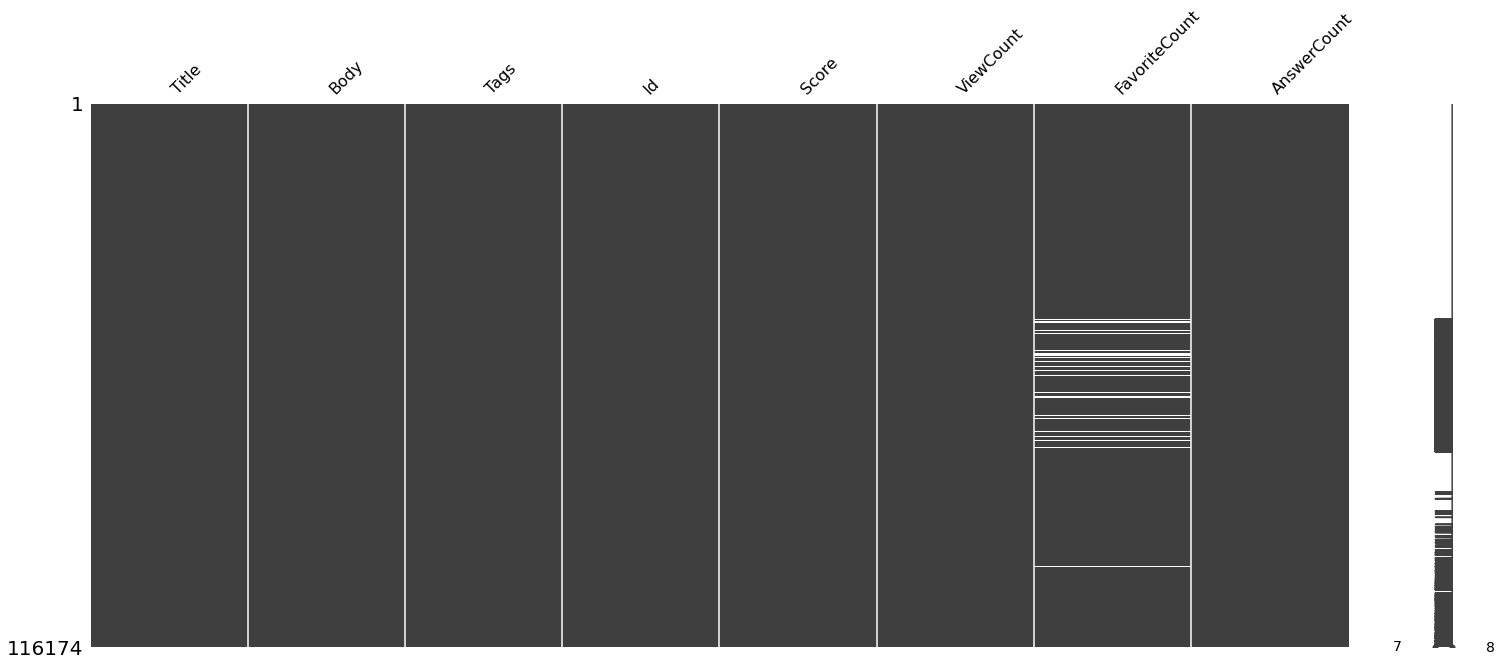

In [6]:
msno.matrix(df)

In [7]:
df["Score"].describe()

count    116174.000000
mean         64.677733
std         248.628383
min           6.000000
25%          16.000000
50%          27.000000
75%          52.000000
max       26354.000000
Name: Score, dtype: float64

In [8]:
df["ViewCount"].describe()

count    1.161740e+05
mean     6.307668e+04
std      1.714967e+05
min      5.500000e+01
25%      7.994000e+03
50%      2.343800e+04
75%      5.936775e+04
max      9.841945e+06
Name: ViewCount, dtype: float64

In [9]:
df["FavoriteCount"].describe()

count    111814.000000
mean         23.519202
std         105.739197
min           0.000000
25%           6.000000
50%          10.000000
75%          19.000000
max       11570.000000
Name: FavoriteCount, dtype: float64

In [10]:
df["AnswerCount"].describe()

count    116174.000000
mean          5.275879
std           5.321968
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max         125.000000
Name: AnswerCount, dtype: float64

## Analyse Univariée

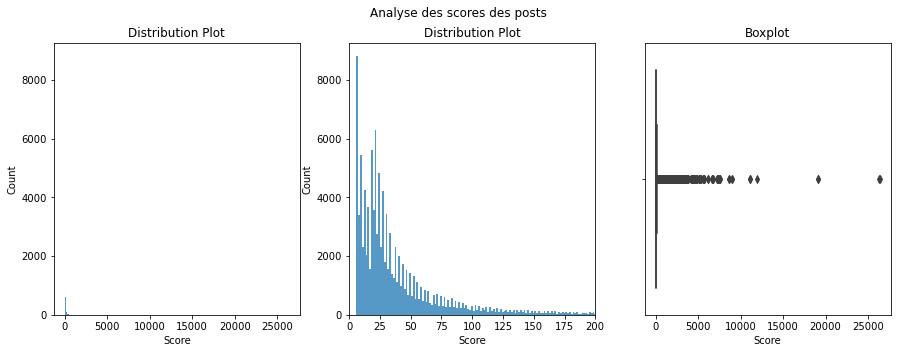

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des scores des posts")

sns.histplot(ax=axes[0], x="Score", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="Score", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,200])

sns.boxplot(ax=axes[2], x="Score", data=df)
axes[2].set_title("Boxplot")

plt.show()

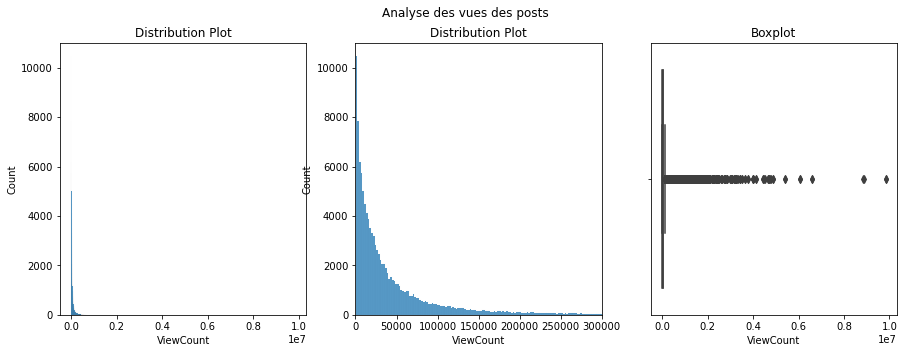

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des vues des posts")

sns.histplot(ax=axes[0], x="ViewCount", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="ViewCount", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,300000])

sns.boxplot(ax=axes[2], x="ViewCount", data=df)
axes[2].set_title("Boxplot")

plt.show()

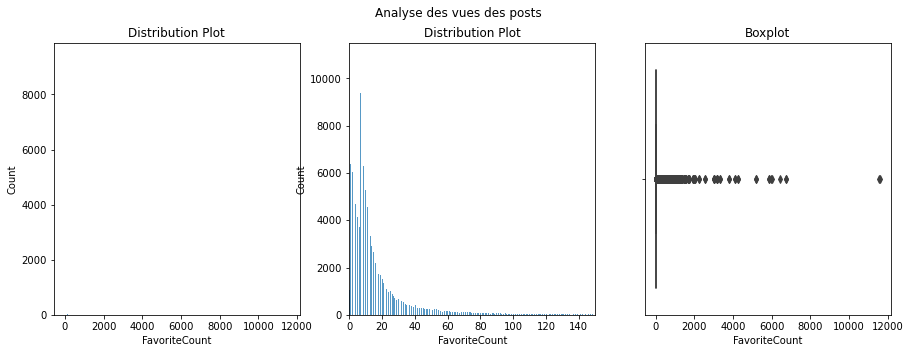

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des vues des posts")

sns.histplot(ax=axes[0], x="FavoriteCount", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="FavoriteCount", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,150])
axes[1].set_ylim([0,11500])

sns.boxplot(ax=axes[2], x="FavoriteCount", data=df)
axes[2].set_title("Boxplot")

plt.show()

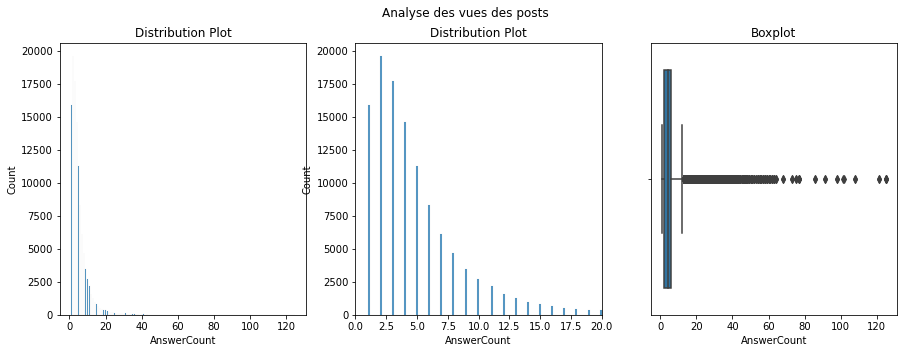

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Analyse des vues des posts")

sns.histplot(ax=axes[0], x="AnswerCount", data=df)
axes[0].set_title("Distribution Plot")

sns.histplot(ax=axes[1], x="AnswerCount", data=df)
axes[1].set_title("Distribution Plot")
axes[1].set_xlim([0,20])

sns.boxplot(ax=axes[2], x="AnswerCount", data=df)
axes[2].set_title("Boxplot")

plt.show()

In [15]:
df["Tags"]

0         <python><attributes><zip><file-permissions><zi...
1         <c><file><directory><cross-platform><common-ta...
2                  <c#><.net><wcf><web-services><datatable>
3         <flutter><dart><refresh><pull-to-refresh><indi...
4         <javascript><validation><angularjs><angular-ui...
                                ...                        
124742         <android><camera><android-camera><adb><ddms>
124743    <c#><asp.net-mvc-5><entity-framework-6><asp.ne...
124744            <javascript><css><html><tags><mime-types>
124745    <git><git-submodules><git-clone><cloning><git-...
124747    <java><android><gson><bouncycastle><android-lint>
Name: Tags, Length: 116174, dtype: object

In [16]:
tag_list = ""
for val in df["Tags"]:
    tag_list+=val

In [17]:
tag_list = tag_list.replace(">",",")
tag_list = tag_list.replace("<","")
tag_list = tag_list[:-1]

In [18]:
tag_list = tag_list.split(",")

In [19]:
tag_df = pd.DataFrame(tag_list,columns = ["tags"])
tag_df

,tags
0,python
1,attributes
2,zip
3,file-permissions
4,zipfile
...,...
580865,java
580866,android
580867,gson
580868,bouncycastle


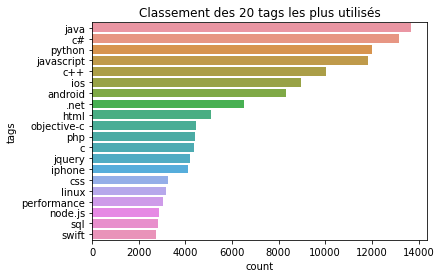

In [20]:
plt.figure()
sns.countplot(y="tags", data=tag_df, order=pd.value_counts(tag_df["tags"]).iloc[:20].index)
plt.ylabel("tags")
plt.title("Classement des 20 tags les plus utilisés")
plt.show()


In [21]:
tag_df["tags"].value_counts()

java                   13675
c#                     13144
python                 12016
javascript             11819
c++                    10025
                       ...  
negative-lookbehind        1
negative-lookahead         1
krakend                    1
zedgraph                   1
sign-in-with-apple         1
Name: tags, Length: 20776, dtype: int64

In [22]:
tag_df["tags"].value_counts().describe()

count    20776.000000
mean        27.958702
std        249.466669
min          1.000000
25%          2.000000
50%          3.000000
75%         10.000000
max      13675.000000
Name: tags, dtype: float64

## Analyse bivariée

<AxesSubplot:>

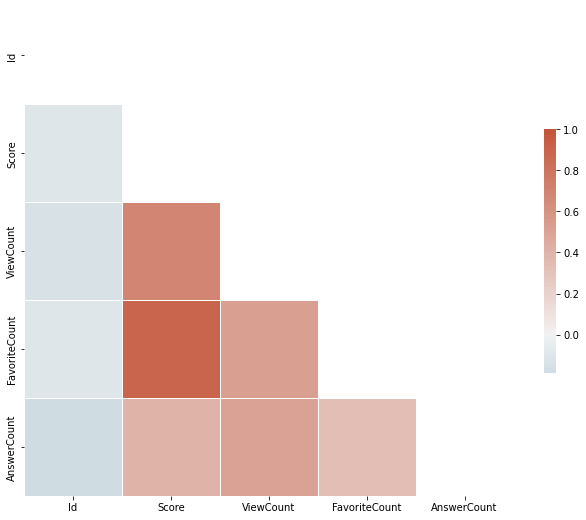

In [23]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

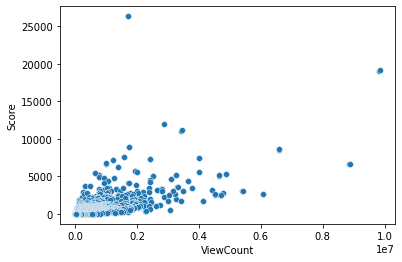

In [24]:
sns.scatterplot(data=df, x="ViewCount", y="Score")
plt.show()

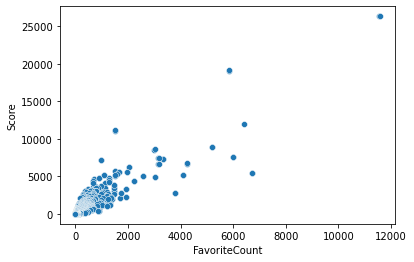

In [25]:
sns.scatterplot(data=df, x="FavoriteCount", y="Score")
plt.show()

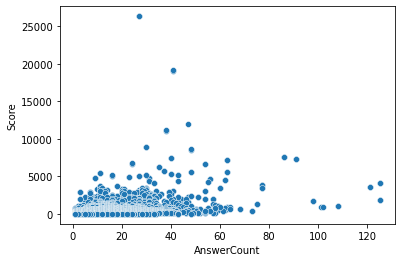

In [26]:
sns.scatterplot(data=df, x="AnswerCount", y="Score")
plt.show()

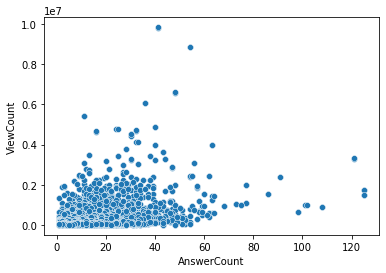

In [27]:
sns.scatterplot(data=df, x="AnswerCount", y="ViewCount")
plt.show()

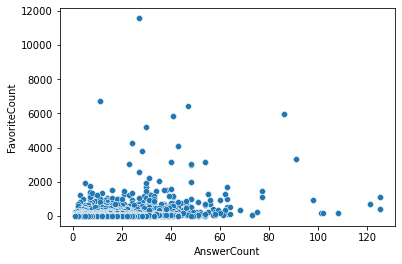

In [28]:
sns.scatterplot(data=df, x="AnswerCount", y="FavoriteCount")
plt.show()

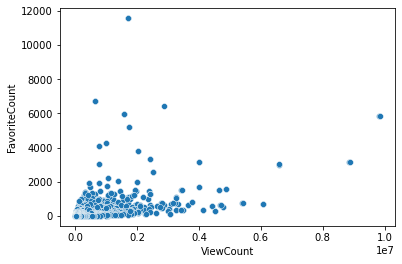

In [29]:
sns.scatterplot(data=df, x="ViewCount", y="FavoriteCount")
plt.show()

## Analyse de texte

In [39]:
df_txt = pd.DataFrame()
df_txt["Id"] = df["Id"]
#df_txt["Title"] = df["Title"].apply(nlp_module.normalize_corpus)
#df_txt["Body"] = df["Body"].apply(nlp_module.normalize_corpus)

df_txt["Title"] = df["Title"].apply(nlp_module.remove_stopwords).apply(nlp_module.strip_html_tags).str.lower()
df_txt["Body"] = df["Body"].apply(nlp_module.remove_stopwords).apply(nlp_module.strip_html_tags).str.lower()

In [40]:
df_txt["Tags"] = df["Tags"].replace({'>':' '},regex=True).replace({'<':''},regex=True)

In [41]:
df_txt["Body"]

0         when extract files zip file created python zip...
1         how scan directory folders files c ? needs cro...
2         i wcf service want return datatable. know ofte...
3         i added refreshindicator page , no indicator v...
4         is way validate field angular without using di...
                                ...                        
124742    i ' currently trying get camera working app ' ...
124743    i ' writing simple blog application trying est...
124744     possible duplicate :  why write < ; script ty...
124745    i project handful submodules. many cloned gith...
124747    i ' issues bouncycastle , arise running  : lin...
Name: Body, Length: 116174, dtype: object

In [42]:
df_txt["Tags"]

0           python attributes zip file-permissions zipfile 
1             c file directory cross-platform common-tasks 
2                       c# .net wcf web-services datatable 
3           flutter dart refresh pull-to-refresh indicator 
4         javascript validation angularjs angular-ui ui-...
                                ...                        
124742              android camera android-camera adb ddms 
124743    c# asp.net-mvc-5 entity-framework-6 asp.net-id...
124744                 javascript css html tags mime-types 
124745     git git-submodules git-clone cloning git-remote 
124747         java android gson bouncycastle android-lint 
Name: Tags, Length: 116174, dtype: object

In [59]:
def find_value_column(row):
    return row.Tags.strip() in row.Body.strip()

df_txt[df_txt.apply(find_value_column, axis=1)][['Body', 'Tags']]

,Body,Tags


In [60]:
df_txt['contained'] = df_txt.apply(lambda x: x.Body in x.Tags, axis=1)

In [54]:
df_txt['contained'].describe()

count     116174
unique         1
top        False
freq      116174
Name: contained, dtype: object

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vectorizer = CountVectorizer()

In [64]:
matrix = vectorizer.fit_transform(df_txt["Tags"])

counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
counts

MemoryError: Unable to allocate 12.0 GiB for an array with shape (116174, 13914) and data type int64

In [65]:
matrix

<116174x13914 sparse matrix of type '<class 'numpy.int64'>'
	with 649039 stored elements in Compressed Sparse Row format>